# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Load data

In [2]:
df = pd.read_csv('LAozone.data')
df.head()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7


# A. Linear Regression with All features (25 points)

In [3]:
y = df['ozone']
X = df.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [5]:
LinReg = LinearRegression()
LinReg.fit(X_train_scaled, y_train)
y_pred = LinReg.predict(X_test_scaled)

In [6]:
coefs = np.round(LinReg.coef_, decimals=2)
columns = df.columns[1:]
intercept = round(LinReg.intercept_, 2)

In [7]:
print('Columns:',list(columns))
print('Coefficients:',list(coefs))
print('Intercept:',intercept)

Columns: ['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis', 'doy']
Coefficients: [-0.7, -0.21, 1.42, 3.94, -1.18, 0.04, 1.79, -0.56, -0.94]
Intercept: 11.68


In [8]:
y_train_pred = LinReg.predict(X_train_scaled)
y_test_pred = LinReg.predict(X_test_scaled)

train_mse = np.round(mean_squared_error(y_train, y_train_pred), decimals = 2)
test_mse = np.round(mean_squared_error(y_test, y_test_pred), decimals = 2)

print("Train set MSE:", train_mse)
print("Test set MSE:", test_mse)

Train set MSE: 18.47
Test set MSE: 21.89


# B. Linear regression with one feature

<AxesSubplot:>

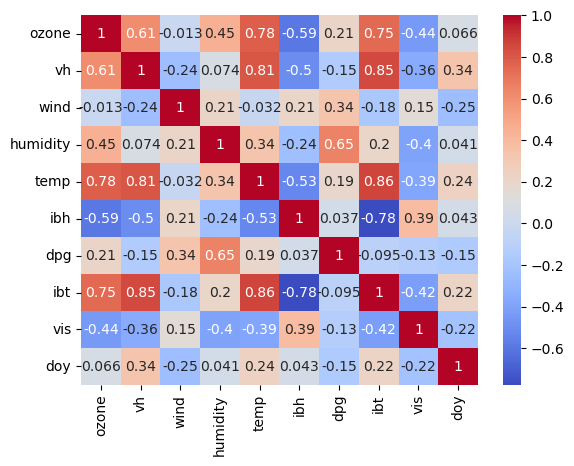

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [10]:
max_index = np.argmax(df.corr()["ozone"][1:])
print("Max correlation value at index",max_index)

Max correlation value at index 3


In [11]:
best_feature_train = np.array(X_train.iloc[:, max_index]).reshape(-1, 1)
best_feature_test = np.array(X_test.iloc[:, max_index]).reshape(-1, 1) 

In [12]:
LinReg_1 = LinearRegression().fit(best_feature_train, y_train)
y_pred_1 = LinReg_1.predict(best_feature_test)

In [13]:
coefs_1 = round(LinReg_1.coef_[0], 2)
columns_1 = df.columns[max_index+1]
intercept_1 = round(LinReg_1.intercept_, 2)

In [14]:
print('Feature:',columns_1)
print('Coefficient:',coefs_1)
print('Intercept:',intercept_1)

Feature: temp
Coefficient: 0.43
Intercept: -15.13


In [15]:
y_train_pred_1 = LinReg_1.predict(best_feature_train)
y_test_pred_1 = LinReg_1.predict(best_feature_test) 

train_mse_1 = np.round(mean_squared_error(y_train, y_train_pred_1), decimals = 2)
test_mse_1 = np.round(mean_squared_error(y_test, y_test_pred_1), decimals = 2)

print("Train set MSE:", train_mse_1)
print("Test set MSE:", test_mse_1)

Train set MSE: 24.96
Test set MSE: 25.17


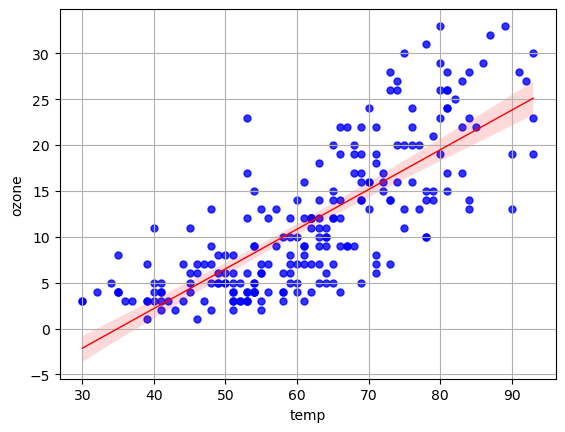

In [16]:
sns.regplot(x=best_feature_train.flatten(), y=y_train, color='blue',
            scatter_kws={"s": 25}, line_kws={"linewidth": 1,'color': 'red'})
plt.xlabel('temp')
plt.grid(True)
plt.show()

# C. Linear regression on splitted data by median

In [17]:
df_1 = pd.DataFrame(df, columns=['ozone', 'temp'])
temp_median = df_1['temp'].median()

In [18]:
lower_df = df_1[df_1['temp'] <= temp_median]
upper_df = df_1[df_1['temp'] > temp_median]

Below Median:

In [19]:
y_L = lower_df['ozone']
X_L = np.array(lower_df['temp']).reshape(-1, 1)

In [20]:
X_train_L, X_test_L, y_train_L, y_test_L = train_test_split(X_L, y_L, test_size=0.3, random_state=42)

In [21]:
LinReg_L = LinearRegression().fit(X_train_L, y_train_L)
y_pred_L = LinReg_L.predict(X_test_L) 

In [22]:
coefs_L = round(LinReg_L.coef_[0], 2)
intercept_L = round(LinReg_L.intercept_, 2)

In [23]:
print('Coefficient:',coefs_L)
print('Intercept:',intercept_L)

Coefficient: 0.18
Intercept: -2.43


In [24]:
y_train_pred_L = LinReg_L.predict(X_train_L)
y_test_pred_L = LinReg_L.predict(X_test_L) 

train_mse_L = np.round(mean_squared_error(y_train_L, y_train_pred_L), decimals = 2)
test_mse_L = np.round(mean_squared_error(y_test_L, y_test_pred_L), decimals = 2)

print("Train set MSE:", train_mse_L)
print("Test set MSE:", test_mse_L)

Train set MSE: 10.87
Test set MSE: 14.77


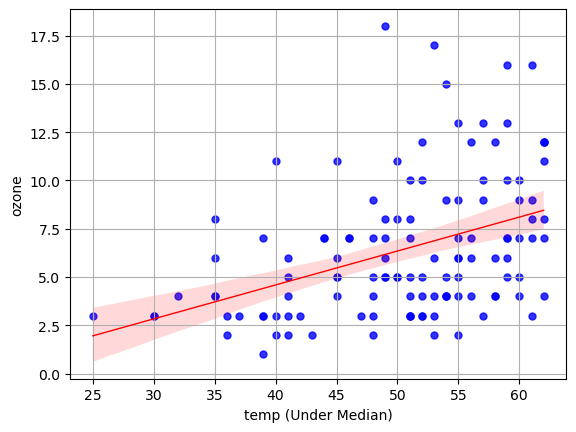

In [25]:
sns.regplot(x=X_train_L.flatten(), y=y_train_L, color='blue',
            scatter_kws={"s": 25}, line_kws={"linewidth": 1,'color': 'red'})
plt.xlabel('temp (Under Median)')
plt.grid(True)
plt.show()

Above Median:

In [26]:
y_U = upper_df['ozone']
X_U = np.array(upper_df['temp']).reshape(-1, 1)

In [27]:
X_train_U, X_test_U, y_train_U, y_test_U = train_test_split(X_U, y_U, test_size=0.3, random_state=42)

In [28]:
LinReg_U = LinearRegression().fit(X_train_U, y_train_U)
y_pred_U = LinReg_L.predict(X_test_U) 

In [29]:
coefs_U = round(LinReg_U.coef_[0], 2)
intercept_U = round(LinReg_U.intercept_, 2)

In [30]:
print('Coefficient:',coefs_U)
print('Intercept:',intercept_U)

Coefficient: 0.55
Intercept: -22.97


In [31]:
y_train_pred_U = LinReg_U.predict(X_train_U)
y_test_pred_U = LinReg_U.predict(X_test_U) 

train_mse_U = np.round(mean_squared_error(y_train_U, y_train_pred_U), decimals = 2)
test_mse_U = np.round(mean_squared_error(y_test_U, y_test_pred_U), decimals = 2)

print("Train set MSE:", train_mse_U)
print("Test set MSE:", test_mse_U)

Train set MSE: 28.79
Test set MSE: 41.26


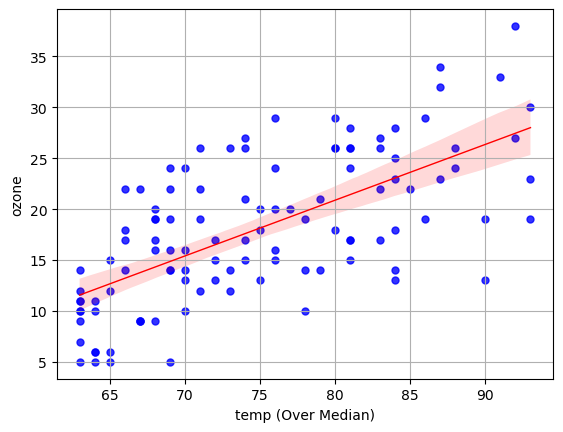

In [32]:
sns.regplot(x=X_train_U.flatten(), y=y_train_U, color='blue',
            scatter_kws={"s": 25}, line_kws={"linewidth": 1,'color': 'red'})
plt.xlabel('temp (Over Median)')
plt.grid(True)
plt.show()

Below and Above Median Average:

In [33]:
mean_coef = round((coefs_U + coefs_L)/2, 2)
mean_intercept = round((intercept_U + intercept_L)/2, 2)
print('Mean coefficient of under median and over median parts:',mean_coef)
print('Mean intercept of under median and over median parts:',mean_intercept)

Mean coefficient of under median and over median parts: 0.36
Mean intercept of under median and over median parts: -12.7


Comparison:

In [34]:
coefs_diff = round(abs(mean_coef - coefs_1), 2)
intercept_diff = round(abs(mean_intercept - intercept_1), 2)
print('Difference between coefficient of part B and part C: ', coefs_diff)
print('Difference between intercept of part B and part C: ', intercept_diff)

Difference between coefficient of part B and part C:  0.07
Difference between intercept of part B and part C:  2.43
